In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
# warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Configure plots
plt.style.use('ggplot')

In [2]:
# #We will be only using ZHVI datasets for timeseries for housing prices
# filePath_ZHVI = {
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_1bedroom_time_series.csv",
#     # "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_2bedroom_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_3bedroom_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_4bedroom_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_5+bedroom_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Bottom_tier_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Top_tier_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_Condo-Co-op_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_Single_Family_Homes_time_series.csv",
#     "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_Single_Family_Residence_smoothAdjusted.csv"
# }

# filePath_Sale_Listing = {
#     "updated-zillow-price/For_Sale_Listings/Metro_US_NewlyPendingListings(Smooth,Allhomes,monthly).csv"
# }

# filePath_ZORI = {
#     "updated-zillow-price/Rental(ZORI)/City_ZORI_All_Homes_Plus_Mutlifamily_time_series_(smoothed-seasonallyAdjusted).csv",
#     "updated-zillow-price/Rental(ZORI)/City_ZORI_All_Homes_Plus_Mutlifamily_time_series_(smoothed).csv"
# }

# filePathSalePrice = {
#     "updated-zillow-price/Sales_Price/Metro_US_Mean_Sale_Price_(Smooth,SeasonallyAdjusted,All_Homes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Mean_Sale_to_List_Ratio_(Smooth,All_Homes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Median_Sale_Price_(Smooth,SeasonallyAdjusted,All_Homes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Median_Sale_to_List_Ratio_(Smooth,All_Homes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Percent_of_Homes_Sold_Above_List_(Smooth,AllHomes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Percent_of_Homes_Sold_Below_List_(Smooth,AllHomes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Metro_US_Total_Transaction_Value_(Smooth,SeasonallyAdjusted,All_Homes,Monthly).csv",
#     "updated-zillow-price/Sales_Price/Sales_Count_Nowcast_(Raw,All_Homes).csv"
# }

# fileHeatIndex = "updated-zillow-price/Market_Heat_Index/Metro_US_Market_Heat_Index_(AllHomes,Monthly).csv"

# filePathPriceCut = {
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Mean_Days_to_Close_(Smooth, AllHomes, Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Mean_Days_to_Pending_(Smooth, AllHomes, Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Mean_Price_Cut_(%,Smoothed,AllHomes,Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Mean_Price_Cut_($,Smoothed,AllHomes,Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Median_Days_to_Close_(Smooth, AllHomes, Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Median_Days_to_Pending_(Smooth, AllHomes, Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Median_Price_Cut_(%,Smoothed,AllHomes,Monthly).csv",
#     "updated-zillow-price/Days_On_Market_and_Price_cuts/Metro_US_Median_Price_Cut_($,Smoothed,AllHomes,Monthly).csv"
# }

In [3]:
# Define file paths for Bottom Tier and Top Tier datasets
file_paths = {
    "Bottom_Tier": "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Bottom_tier_time_series.csv",
    "Top_Tier": "updated-zillow-price/HomeValues(ZHVI)/City_ZHVI_All_Homes_Top_tier_time_series.csv"
}

In [4]:
# Load the data and preview it
bottom_tier_df = pd.read_csv(file_paths["Bottom_Tier"])
top_tier_df = pd.read_csv(file_paths["Top_Tier"])

# Display the first few rows of each dataset
print("Bottom Tier Data:")
display(bottom_tier_df.head())

print("\nTop Tier Data:")
display(top_tier_df.head())

Bottom Tier Data:


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,135938.093262,136672.233081,...,461923.166998,463171.318404,465953.643715,469142.548055,472480.005497,474590.610662,477165.895357,480334.424266,483028.450059,485195.514445
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,120410.861777,120614.264869,...,668843.532299,664215.199498,659210.586511,657311.420982,657638.408837,657739.438926,660053.626985,664284.651174,670006.775231,674549.647456
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,55418.285342,55415.860445,...,183825.841226,184258.721736,185029.555794,185921.642130,186638.607863,186682.894332,186135.499489,185318.397157,184377.989756,183498.816489
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,71478.725430,71474.655059,...,171815.885212,172423.131077,173586.333992,175624.413260,177272.948519,178365.651537,178847.839398,179256.083273,179427.563834,179387.979344
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,55864.856966,55917.873378,...,169678.755511,169205.285486,169503.587781,170268.484965,170857.340754,170966.394600,170142.893326,169117.236488,167900.851318,166869.334784



Top Tier Data:


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,614413.472712,617772.048290,...,1.335844e+06,1.335482e+06,1.339964e+06,1.345716e+06,1.350540e+06,1.350240e+06,1.350597e+06,1.352696e+06,1.356184e+06,1.358380e+06
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,424997.704968,425616.915266,...,1.686668e+06,1.669100e+06,1.652783e+06,1.645160e+06,1.643073e+06,1.637440e+06,1.637274e+06,1.642561e+06,1.654145e+06,1.662113e+06
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,223689.361591,223655.019919,...,4.589952e+05,4.603469e+05,4.622704e+05,4.643360e+05,4.655674e+05,4.656578e+05,4.650730e+05,4.646022e+05,4.649419e+05,4.654256e+05
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,312838.178372,313070.807642,...,5.047138e+05,5.052110e+05,5.078096e+05,5.108178e+05,5.126829e+05,5.128935e+05,5.126892e+05,5.129747e+05,5.137060e+05,5.143352e+05
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,175956.367623,176153.899258,...,3.913755e+05,3.906418e+05,3.911624e+05,3.920717e+05,3.925350e+05,3.922292e+05,3.913108e+05,3.905081e+05,3.900597e+05,3.899283e+05


In [5]:
# Function to filter the dataset for Boulder, CO
def filter_boulder_data(df):
    # Filter for Boulder, CO
    boulder_data = df[(df["RegionName"] == "Boulder") & (df["State"] == "CO")]
    
    # If no data found
    if boulder_data.empty:
        print("No data found for Boulder, CO.")
        return None

    # Extract columns that match the time-series format (e.g., 'YYYY-MM-DD' or 'YYYY-MM')
    date_columns = boulder_data.columns[7:]
    valid_date_columns = [col for col in date_columns if col.startswith("20")]
    
    # Create time-series data
    time_series = boulder_data[valid_date_columns].T  # Transpose to get time-series
    time_series.columns = ["Price"]  # Set column name
    time_series.index = pd.to_datetime(valid_date_columns, format='%Y-%m-%d', errors='coerce')  # Explicit format
    return time_series

# Filter data for Boulder, CO in Bottom Tier and Top Tier datasets
boulder_bottom_tier = filter_boulder_data(bottom_tier_df)
boulder_top_tier = filter_boulder_data(top_tier_df)

# Display the filtered Boulder time-series data
print("Boulder Bottom Tier Time-Series Data:")
display(boulder_bottom_tier.head())

print("\nBoulder Top Tier Time-Series Data:")
display(boulder_top_tier.head())


Boulder Bottom Tier Time-Series Data:


,Price
2000-01-31,149254.622015
2000-02-29,149902.154903
2000-03-31,150707.974410
2000-04-30,152410.359014
2000-05-31,154331.340536



Boulder Top Tier Time-Series Data:


,Price
2000-01-31,488939.691554
2000-02-29,490760.819223
2000-03-31,493239.606539
2000-04-30,498567.510918
2000-05-31,504742.094134


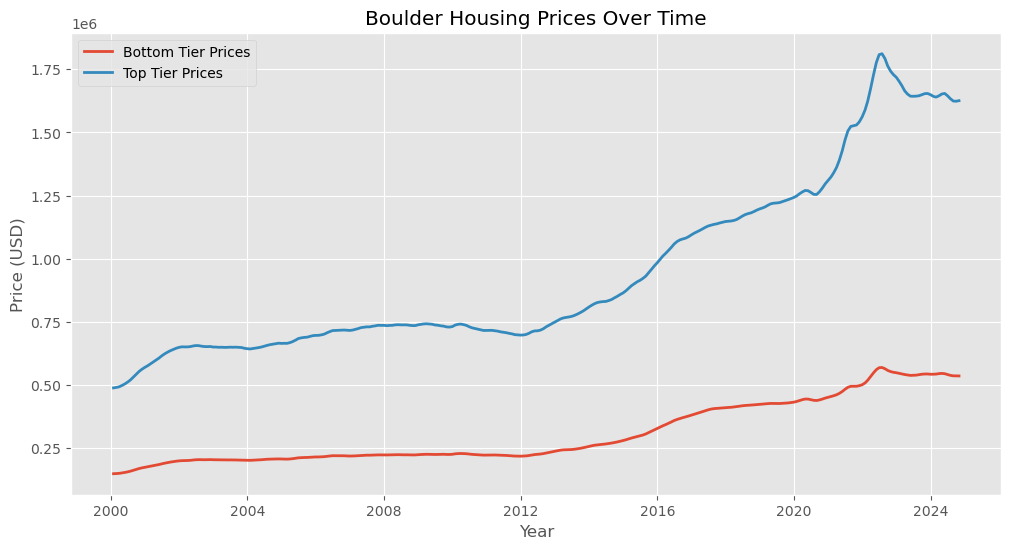

In [6]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(boulder_bottom_tier.index, boulder_bottom_tier["Price"], label="Bottom Tier Prices", linewidth=2)
plt.plot(boulder_top_tier.index, boulder_top_tier["Price"], label="Top Tier Prices", linewidth=2)
plt.title("Boulder Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
#Use this to check if time-series is stationary... Its essentail for ARIMA/SARIMA because models assume that statistical properties (mean, variance, autocorrelation) of time series don't change over time
def check_stationarity(time_series):
    result = adfuller(time_series["Price"])
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

# Check stationarity for Bottom Tier and Top Tier
print("Bottom Tier Stationarity Check:")
check_stationarity(boulder_bottom_tier)
print("\nTop Tier Stationarity Check:")
check_stationarity(boulder_top_tier)

Bottom Tier Stationarity Check:
ADF Statistic: 0.0698003901724621
p-value: 0.9639377059261884
Critical Values:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
The data is not stationary.

Top Tier Stationarity Check:
ADF Statistic: 0.22854307686522216
p-value: 0.9738178100867038
Critical Values:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
The data is not stationary.


In [11]:

#Since not stationary, since p-values were greater than 0.05, ADF were not less than critical values
# To make data stationary, we need to apply transformations to remove the trend and stabilize variance.
# WE did differening: Subtract each data point from previous point to remove trends
# This made teh series fluctuate around constant mean

# Apply first-order differencing
boulder_bottom_tier_diff = boulder_bottom_tier.diff().dropna()
boulder_top_tier_diff = boulder_top_tier.diff().dropna()

# Re-run the ADF test
print("Bottom Tier Stationarity Check After Differencing:")
check_stationarity(boulder_bottom_tier_diff)

print("\nTop Tier Stationarity Check After Differencing:")
check_stationarity(boulder_top_tier_diff)


Bottom Tier Stationarity Check After Differencing:
ADF Statistic: -3.3114111466144465
p-value: 0.0143760378376424
Critical Values:
   1%: -3.453922368485787
   5%: -2.871918329081633
   10%: -2.5723001147959184
The data is stationary.

Top Tier Stationarity Check After Differencing:
ADF Statistic: -4.025970925868225
p-value: 0.001280461742510809
Critical Values:
   1%: -3.453922368485787
   5%: -2.871918329081633
   10%: -2.5723001147959184
The data is stationary.


Both Tiers are stationary, and it is ready for ARIMA/SARIMA modeling

# Using Arima and SARIMA Models:
We will use ARIMA for simpler modeling... SARIMA if seasonality is suspected (Housing prices)
Steps:
We will plot the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) for both differenced datasets to estimate the ARIMA parameters:
p: Number of lag terms (From PACF)
q: Number of moving average terms (FROM ACF)

Then we will forcast: Use fitted models to forecast future housing prices and compare trends between bottom tier and top tier

ACF and PACF for Bottom Tier:


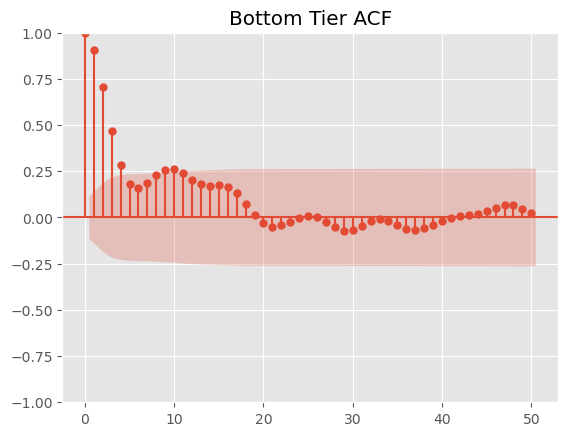

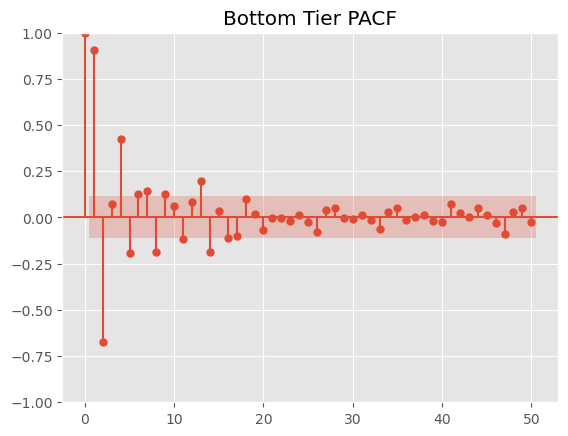

ACF and PACF for Top Tier:


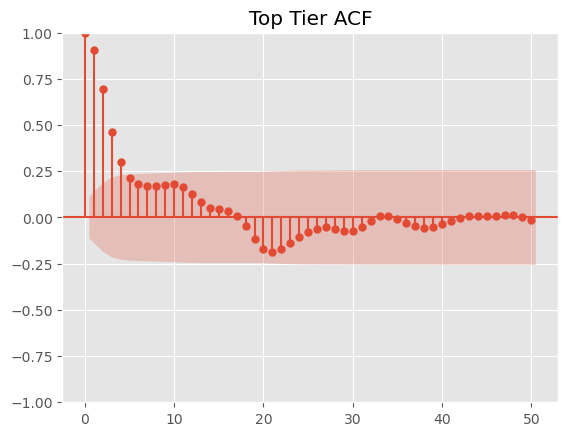

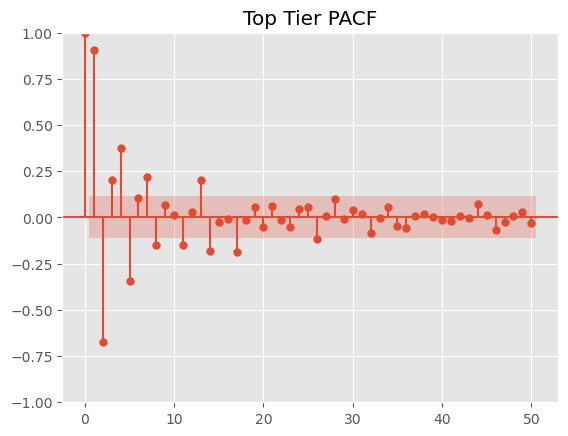

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for Bottom Tier
print("ACF and PACF for Bottom Tier:")
plot_acf(boulder_bottom_tier_diff, lags=50)
plt.title("Bottom Tier ACF")
plt.show()

plot_pacf(boulder_bottom_tier_diff, lags=50)
plt.title("Bottom Tier PACF")
plt.show()

# Plot ACF and PACF for Top Tier
print("ACF and PACF for Top Tier:")
plot_acf(boulder_top_tier_diff, lags=50)
plt.title("Top Tier ACF")
plt.show()

plot_pacf(boulder_top_tier_diff, lags=50)
plt.title("Top Tier PACF")
plt.show()


1. ACF (Autocorrelation Function)
The ACF plot shows the correlation between the time series and its lagged values. In simpler terms, it tells you how much today's data is related to data from previous days, months, or years.
Each bar in the ACF plot represents the correlation (or strength of the relationship) between the series and its lags:
Lag 1 means "today vs yesterday."
Lag 2 means "today vs two days ago," and so on.
Key Observations:
Slow decay in the ACF: Suggests that the data may be non-stationary (but you've already differenced the data to make it stationary).
Significant spikes at specific lags: This can indicate how many terms you might need in the Moving Average (MA) part of the ARIMA model (q parameter).
In your plot:

For Bottom Tier, the ACF shows a gradual decay but has some clear spikes near the first few lags. This suggests there may be some short-term dependencies in the series.

For Top Tier, the behavior is similar, with significant correlations at early lags.

2. PACF (Partial Autocorrelation Function)
The PACF plot shows the correlation between the time series and its lagged values after removing the effects of intermediate lags. This isolates the "direct" relationship between a time point and its lag.
It helps determine the number of AutoRegressive (AR) terms (p parameter) in the ARIMA model.
Key Observations:
Cut-off in PACF: A sharp drop-off after a certain lag suggests the number of AR terms to include (p).
For example:
If the PACF cuts off after lag 2, you might choose p = 2.
In your plot:

For Bottom Tier, the PACF cuts off sharply after lag 1 or 2, suggesting an AR(1) or AR(2) might work well.

For Top Tier, it cuts off similarly, suggesting similar AR terms.

In [22]:
# Recalculate the differenced datasets
bottom_tier_diff = boulder_bottom_tier["Price"].diff().dropna()
top_tier_diff = boulder_top_tier["Price"].diff().dropna()

# Define ARIMA parameters based on earlier observations
bottom_tier_params = (2, 1, 1)  # p=2, d=1, q=1
top_tier_params = (2, 1, 1)

# Fit ARIMA models for Bottom Tier and Top Tier
bottom_tier_arima = ARIMA(bottom_tier_diff, order=bottom_tier_params).fit()
top_tier_arima = ARIMA(top_tier_diff, order=top_tier_params).fit()

# Print summaries of the fitted ARIMA models
print("Bottom Tier ARIMA Model Summary:")
print(bottom_tier_arima.summary())
print("\nTop Tier ARIMA Model Summary:")
print(top_tier_arima.summary())


Bottom Tier ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  297
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2370.839
Date:                Tue, 10 Dec 2024   AIC                           4749.678
Time:                        02:35:32   BIC                           4764.440
Sample:                    02-29-2000   HQIC                          4755.588
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4198      0.026     55.440      0.000       1.370       1.470
ar.L2         -0.7071      0.020    -35.905      0.000      -0.746      -0.668
ma.L1         -0.80

C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

1. Bottom Tier ARIMA model:
<br>p = 2: Two autoregressive terms:
<br>d = 1: First differeing applied to make data stationary
<br>q = 1: One moving average term

Coefficients:
Signficiant ar.L1 and ar.L2 (Autoregressive terms) and ma.L1 (moving average term), with p-values close to 0.

Sigma^2 Variance of residiuals are 5.285e+05  which seem reasonable for housing price differences.

Diagnostics:
Ljung-Box Test (Q): No significant autocorrelation in residuals at lag 1.
Jarque-Bera Test (JB): Residuals are not normally distributed (Kurtosis > 5).

2. Top Tier ARIMA model:
<br>p = 2: Two autoregressive terms:
<br>d = 1: First differeing applied to make data stationary
<br>q = 1: One moving average term
Coefficients:
The AR and MA terms are highly significant with p-values near 0.

Sigma^2: Variance of residuals is 7.094e+06, which is higher than the bottom tier (reflecting the higher price range of top-tier homes).


Diagnostics:
Ljung-Box Test (Q): No significant autocorrelation in residuals.
Jarque-Bera Test (JB): Residuals deviate significantly from normality (Kurtosis > 7).

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Refit the ARIMA models for both Bottom Tier and Top Tier
bottom_tier_model = ARIMA(bottom_tier_diff, order=(2, 1, 1)).fit()
top_tier_model = ARIMA(top_tier_diff, order=(2, 1, 1)).fit()

# Display model summaries
print("Bottom Tier ARIMA Model Summary:")
print(bottom_tier_model.summary())

print("\nTop Tier ARIMA Model Summary:")
print(top_tier_model.summary())


Bottom Tier ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  297
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2370.839
Date:                Tue, 10 Dec 2024   AIC                           4749.678
Time:                        02:35:33   BIC                           4764.440
Sample:                    02-29-2000   HQIC                          4755.588
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4198      0.026     55.440      0.000       1.370       1.470
ar.L2         -0.7071      0.020    -35.905      0.000      -0.746      -0.668
ma.L1         -0.80

C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

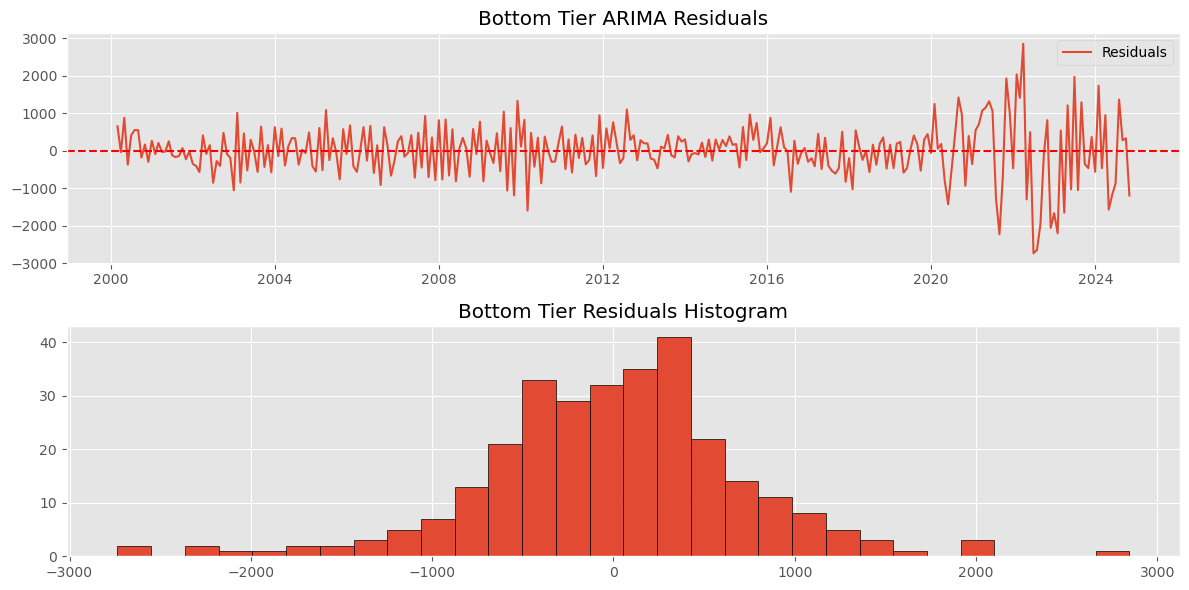

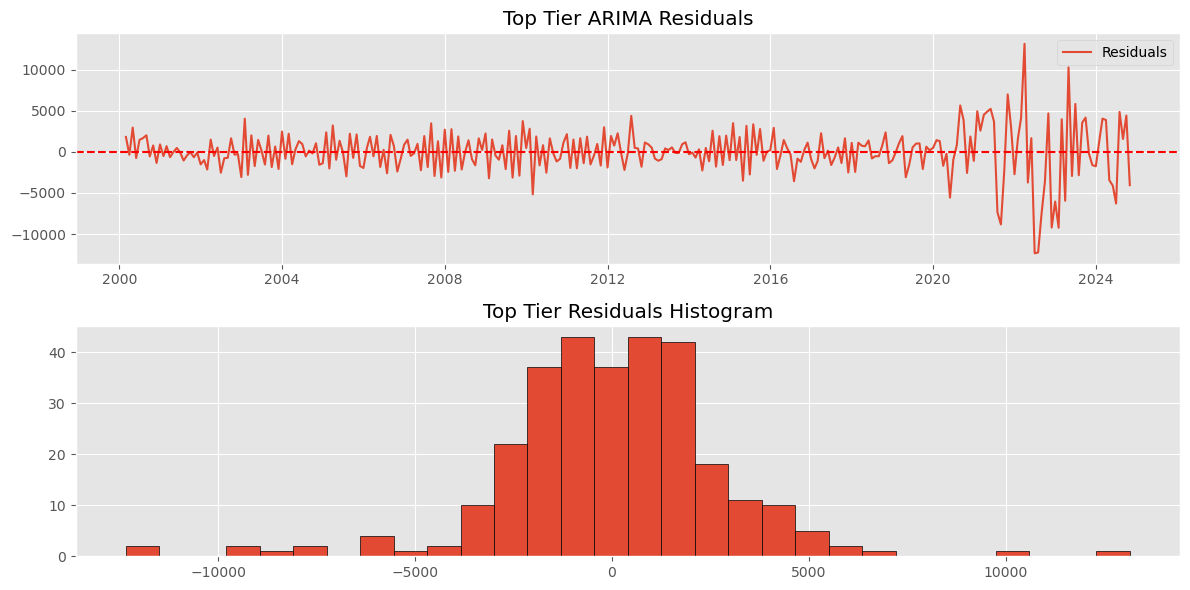

In [27]:
# Plot residuals for Bottom Tier
bottom_tier_residuals = bottom_tier_model.resid
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(bottom_tier_residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Bottom Tier ARIMA Residuals")
plt.legend()

# Histogram of residuals
plt.subplot(2, 1, 2)
plt.hist(bottom_tier_residuals, bins=30, edgecolor='k')
plt.title("Bottom Tier Residuals Histogram")
plt.tight_layout()
plt.show()

# Plot residuals for Top Tier
top_tier_residuals = top_tier_model.resid
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(top_tier_residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Top Tier ARIMA Residuals")
plt.legend()

# Histogram of residuals
plt.subplot(2, 1, 2)
plt.hist(top_tier_residuals, bins=30, edgecolor='k')
plt.title("Top Tier Residuals Histogram")
plt.tight_layout()
plt.show()


In [29]:
# Define the original time series data
bottom_tier = boulder_bottom_tier["Price"]  # Replace with your actual Bottom Tier time series
top_tier = boulder_top_tier["Price"]       # Replace with your actual Top Tier time series


Monthly:


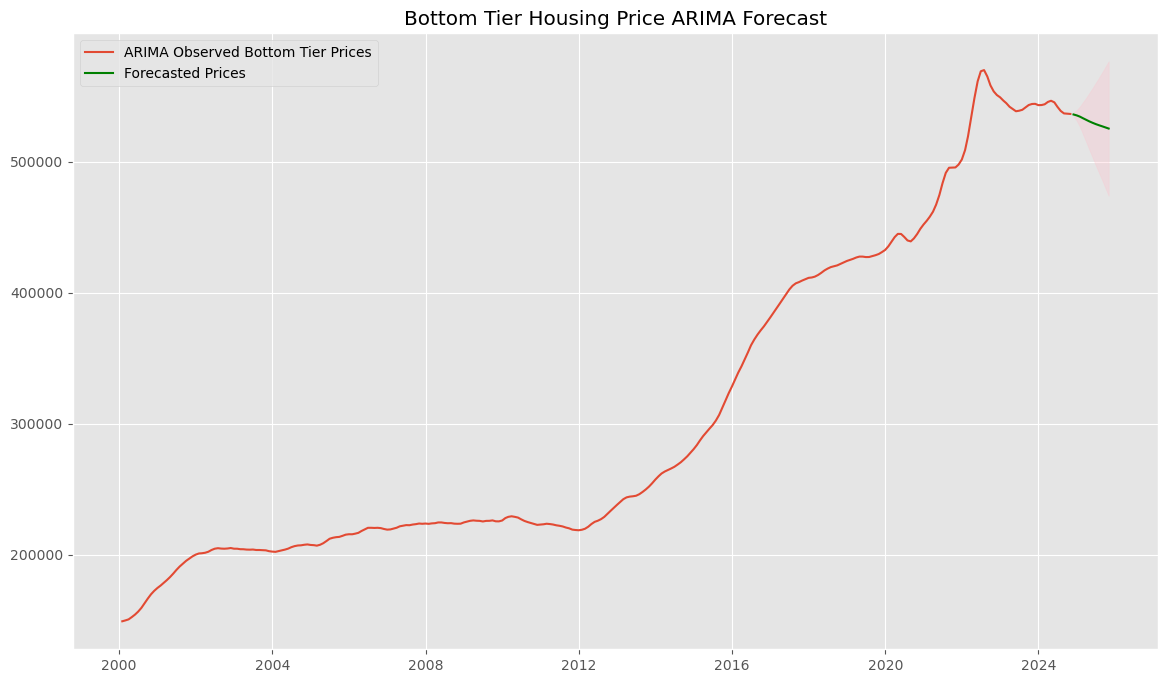

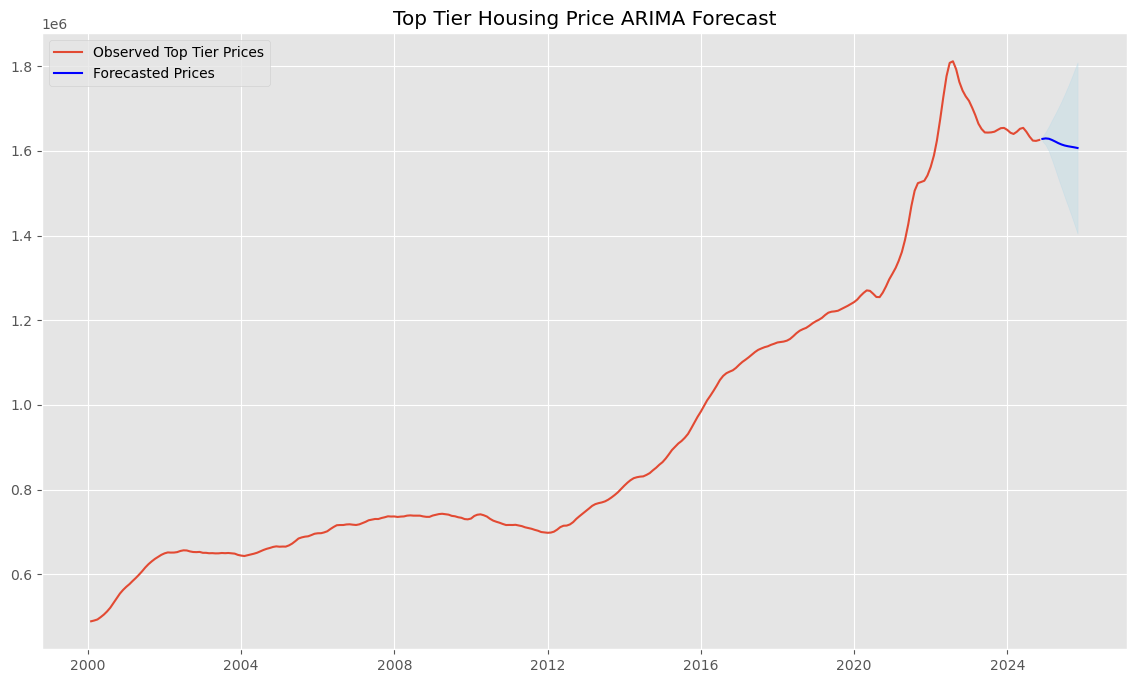

In [32]:
# Reintegrate Bottom Tier Forecast
forecast_bottom = bottom_tier_model.get_forecast(steps=12)
forecast_bottom_diff = forecast_bottom.predicted_mean
forecast_bottom_index = pd.date_range(start=bottom_tier.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="ME")

# Convert differenced forecast to original scale
forecast_bottom_reintegrated = forecast_bottom_diff.cumsum() + bottom_tier.iloc[-1]

# Reintegrate confidence intervals
forecast_bottom_ci = forecast_bottom.conf_int()
forecast_bottom_ci_reintegrated = forecast_bottom_ci.cumsum() + bottom_tier.iloc[-1]

# Reintegrate Top Tier Forecast
forecast_top = top_tier_model.get_forecast(steps=12)
forecast_top_diff = forecast_top.predicted_mean
forecast_top_index = pd.date_range(start=top_tier.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="ME")

# Convert differenced forecast to original scale
forecast_top_reintegrated = forecast_top_diff.cumsum() + top_tier.iloc[-1]

# Reintegrate confidence intervals
forecast_top_ci = forecast_top.conf_int()
forecast_top_ci_reintegrated = forecast_top_ci.cumsum() + top_tier.iloc[-1]

# Plot Forecasts for Bottom Tier
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="ARIMA Observed Bottom Tier Prices")
plt.plot(forecast_bottom_index, forecast_bottom_reintegrated, label="Forecasted Prices", color="green")
plt.fill_between(forecast_bottom_index,
                 forecast_bottom_ci_reintegrated.iloc[:, 0],
                 forecast_bottom_ci_reintegrated.iloc[:, 1],
                 color="pink", alpha=0.3)
plt.title("Bottom Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()

# Plot Forecasts for Top Tier
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices")
plt.plot(forecast_top_index, forecast_top_reintegrated, label="Forecasted Prices", color="blue")
plt.fill_between(forecast_top_index,
                 forecast_top_ci_reintegrated.iloc[:, 0],
                 forecast_top_ci_reintegrated.iloc[:, 1],
                 color="lightblue", alpha=0.3)
plt.title("Top Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()


# Maybe Predict 5 to 20 years into the future with existing data? For Fun to test


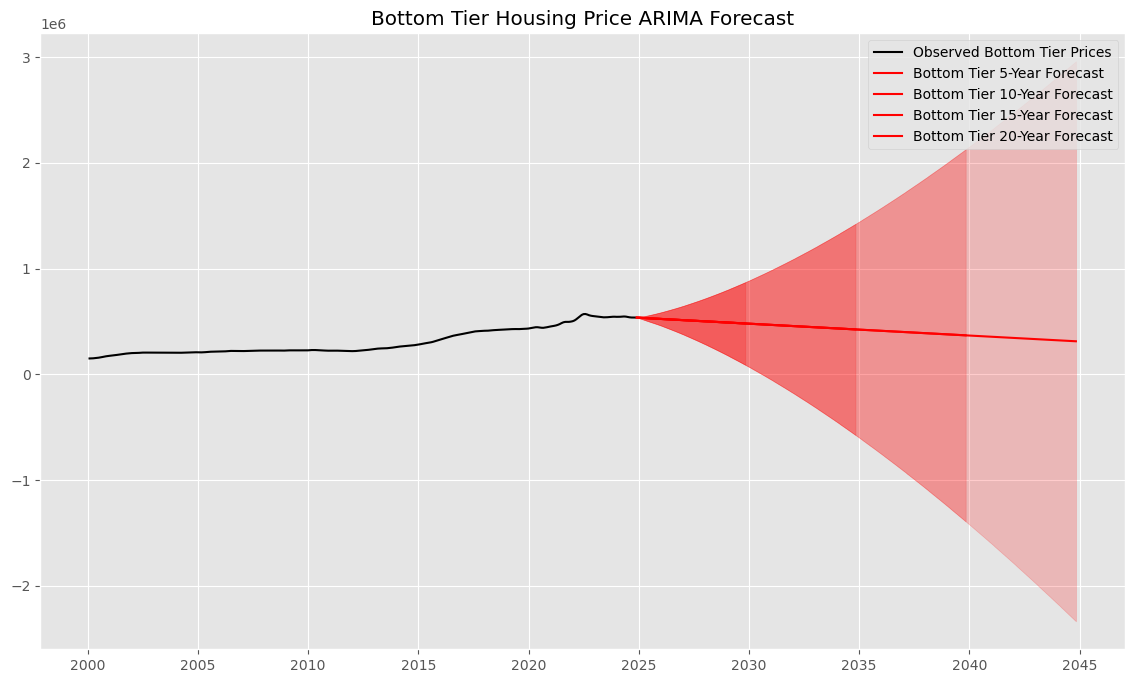

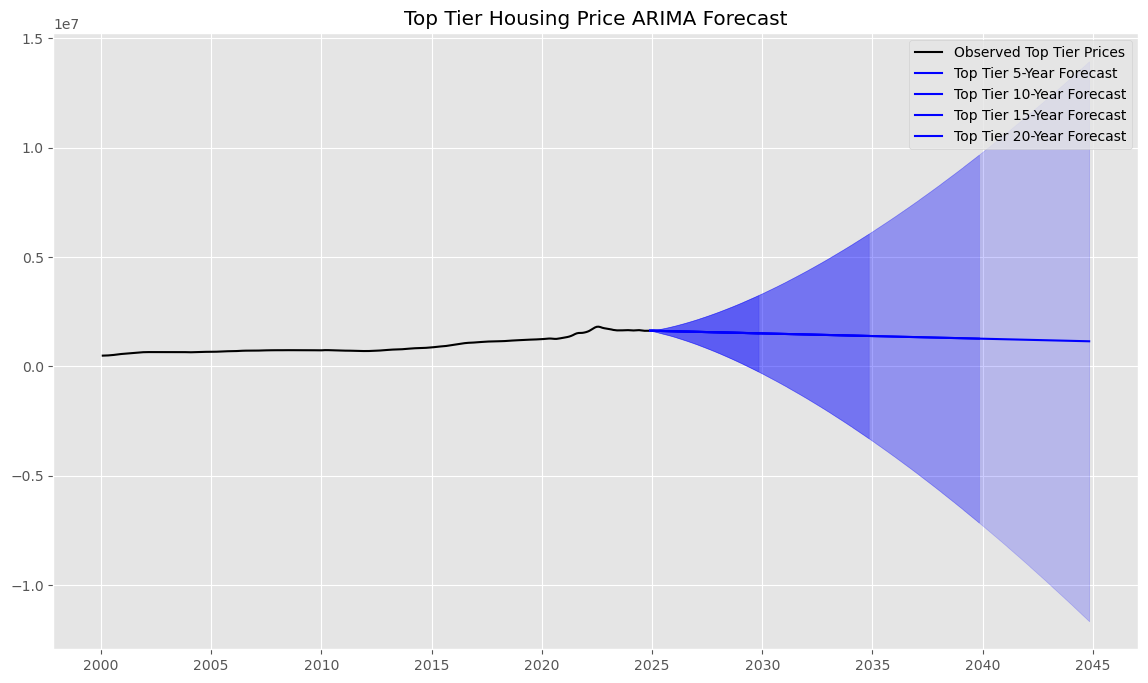

In [35]:
import pandas as pdA
import matplotlib.pyplot as plt

# Define forecasting horizons (5, 10, 15, 20 years)
forecast_years = [5, 10, 15, 20]
steps_per_year = 12  # Monthly data, so 12 steps per year

# Function to forecast and re-integrate
def forecast_future(model, original_data, years, color, label):
    steps = years * steps_per_year  # Total forecast steps
    forecast = model.get_forecast(steps=steps)
    forecast_diff = forecast.predicted_mean
    
    # Generate future index
    future_index = pd.date_range(start=original_data.index[-1] + pd.offsets.MonthEnd(), periods=steps, freq="ME")
    
    # Convert differenced forecast to original scale
    forecast_reintegrated = forecast_diff.cumsum() + original_data.iloc[-1]
    
    # Reintegrate confidence intervals
    forecast_ci = forecast.conf_int()
    forecast_ci_reintegrated = forecast_ci.cumsum() + original_data.iloc[-1]
    
    # Plot forecast
    plt.plot(future_index, forecast_reintegrated, label=f"{label} {years}-Year Forecast", color=color)
    plt.fill_between(future_index,
                     forecast_ci_reintegrated.iloc[:, 0],
                     forecast_ci_reintegrated.iloc[:, 1],
                     color=color, alpha=0.2)

# Plot forecasts for Bottom Tier
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="Observed Bottom Tier Prices", color="black")
for i, years in enumerate(forecast_years):
    forecast_future(bottom_tier_model, bottom_tier, years, color=f"red", label="Bottom Tier")
plt.title("Bottom Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()

# Plot forecasts for Top Tier
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices", color="black")
for i, years in enumerate(forecast_years):
    forecast_future(top_tier_model, top_tier, years, color=f"blue", label="Top Tier")
plt.title("Top Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()


# SARIMA Patterns: 


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Fit a SARIMA model for Bottom Tier
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) - seasonal order
sarima_bottom = SARIMAX(bottom_tier, order=(2, 1, 1), seasonal_order=seasonal_order).fit()
sarima_top = SARIMAX(top_tier, order=(2, 1, 1), seasonal_order=seasonal_order).fit()

# Print SARIMA summary
print("Bottom Tier SARIMA Model Summary:")
print(sarima_bottom.summary())
print("Top Tier SARIMA Model Summary:")
print(sarima_top.summary())




# Forecast with SARIMA for bottm tier
forecast_sarima = sarima_bottom.get_forecast(steps=60)  # 5 years ahead
forecast_sarima_mean = forecast_sarima.predicted_mean
forecast_sarima_ci = forecast_sarima.conf_int()
# Forecast with SARIMA for Top Tier (e.g., 5 years ahead = 60 months)
forecast_sarima_top = sarima_top.get_forecast(steps=60)
forecast_sarima_top_mean = forecast_sarima_top.predicted_mean
forecast_sarima_top_ci = forecast_sarima_top.conf_int()

C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

Bottom Tier SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  298
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2667.441
Date:                            Tue, 10 Dec 2024   AIC                           5346.882
Time:                                    02:35:39   BIC                           5368.797
Sample:                                01-31-2000   HQIC                          5355.667
                                     - 10-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3394      0.211      1.606      0.108      -0.075       0.754
a

C:\Users\fungy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


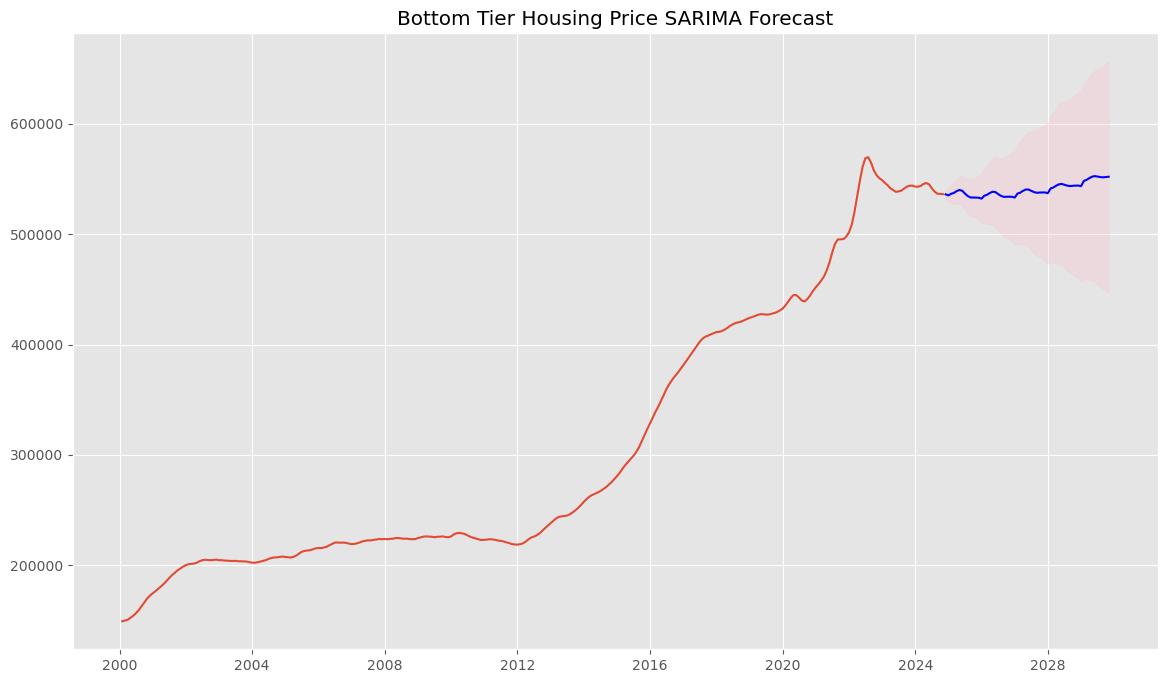

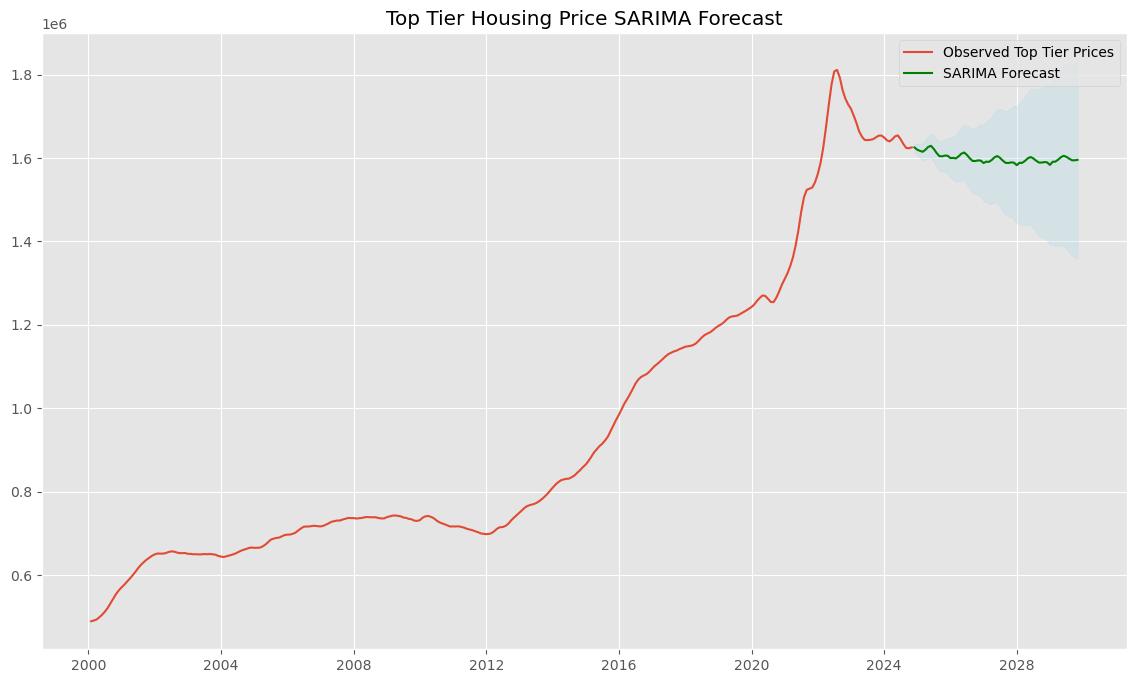

In [39]:
# Plot SARIMA forecast
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="Observed Bottom Tier Prices")
plt.plot(forecast_sarima_mean.index, forecast_sarima_mean, label="SARIMA Forecast", color="blue")
plt.fill_between(forecast_sarima_mean.index,
                 forecast_sarima_ci.iloc[:, 0],
                 forecast_sarima_ci.iloc[:, 1],
                 color="pink", alpha=0.3)
plt.title("Bottom Tier Housing Price SARIMA Forecast")

# Plot SARIMA forecast for Top Tier
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices")
plt.plot(forecast_sarima_top_mean.index, forecast_sarima_top_mean, label="SARIMA Forecast", color="green")
plt.fill_between(forecast_sarima_top_mean.index,
                 forecast_sarima_top_ci.iloc[:, 0],
                 forecast_sarima_top_ci.iloc[:, 1],
                 color="lightblue", alpha=0.3)
plt.title("Top Tier Housing Price SARIMA Forecast")


plt.legend()
plt.show()

It seems that ARIMA aligns better with our study of housing patterns, and we have proceeded with forecasts and analysis.

# SARIMA Patterns PREDICTING 5-20 years: 


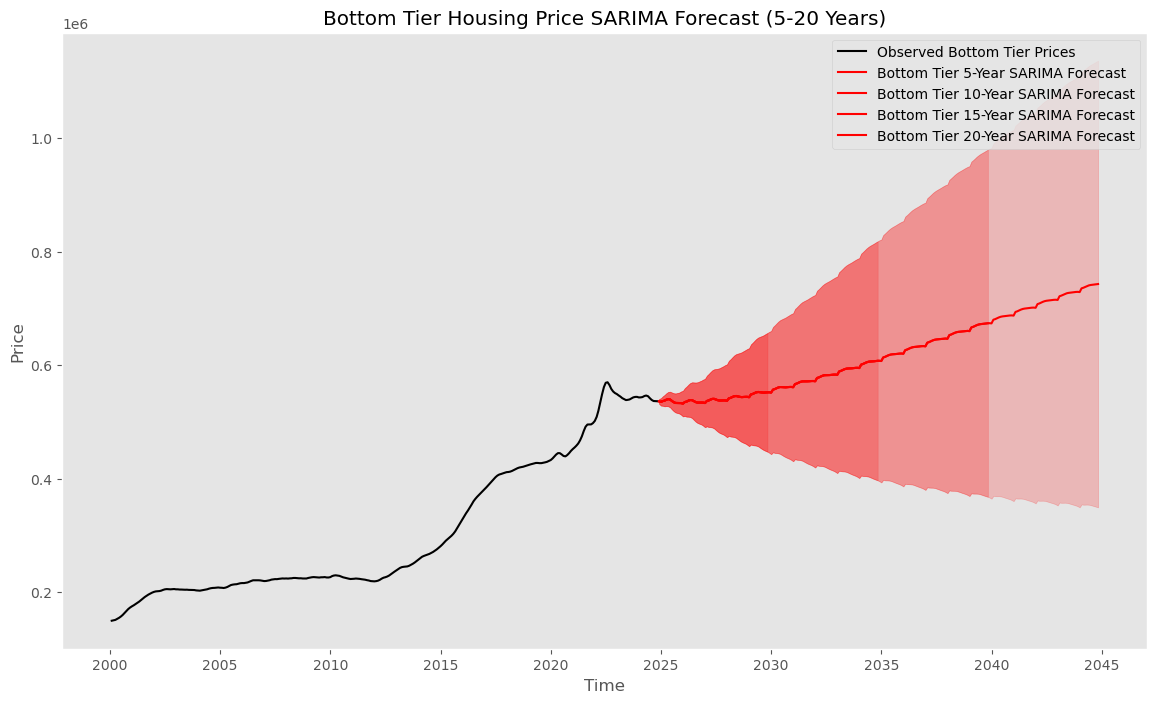

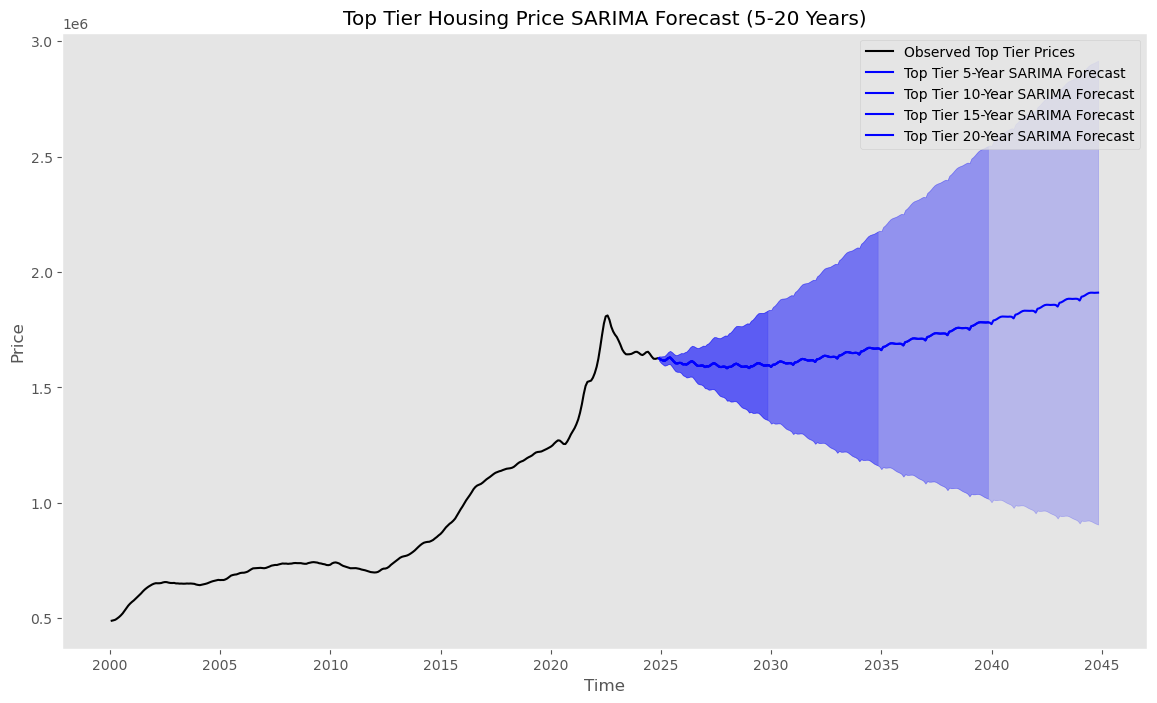

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Define forecasting horizons (5, 10, 15, 20 years)
forecast_years = [5, 10, 15, 20]
steps_per_year = 12  # Monthly data, so 12 steps per year

# Function to forecast and re-integrate SARIMA predictions
def forecast_future_sarima(model, original_data, years, color, label):
    steps = years * steps_per_year  # Total forecast steps
    forecast = model.get_forecast(steps=steps)
    forecast_mean = forecast.predicted_mean

    # Generate future index
    future_index = pd.date_range(start=original_data.index[-1] + pd.offsets.MonthEnd(), periods=steps, freq="ME")

    # Reintegrate confidence intervals
    forecast_ci = forecast.conf_int()

    # Plot forecast
    plt.plot(future_index, forecast_mean, label=f"{label} {years}-Year SARIMA Forecast", color=color)
    plt.fill_between(future_index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color=color, alpha=0.2)

# Plot forecasts for Bottom Tier using SARIMA
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="Observed Bottom Tier Prices", color="black")
for i, years in enumerate(forecast_years):
    forecast_future_sarima(sarima_bottom, bottom_tier, years, color=f"red", label="Bottom Tier")
plt.title("Bottom Tier Housing Price SARIMA Forecast (5-20 Years)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Plot forecasts for Top Tier using SARIMA
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices", color="black")
for i, years in enumerate(forecast_years):
    forecast_future_sarima(sarima_top, top_tier, years, color=f"blue", label="Top Tier")
plt.title("Top Tier Housing Price SARIMA Forecast (5-20 Years)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [64]:

# Generate DataFrames for Bottom Tier Forecasts
arima_bottom_df = pd.DataFrame({
    "ARIMA Forecast": forecast_arima_bottom_mean,
    "ARIMA Lower CI": forecast_arima_bottom_ci.iloc[:, 0],
    "ARIMA Upper CI": forecast_arima_bottom_ci.iloc[:, 1]
})
sarima_bottom_df = pd.DataFrame({
    "SARIMA Forecast": forecast_sarima_bottom_mean,
    "SARIMA Lower CI": forecast_sarima_bottom_ci.iloc[:, 0],
    "SARIMA Upper CI": forecast_sarima_bottom_ci.iloc[:, 1]
})

# Generate DataFrames for Top Tier Forecasts
arima_top_df = pd.DataFrame({
    "ARIMA Forecast": forecast_arima_top_mean,
    "ARIMA Lower CI": forecast_arima_top_ci.iloc[:, 0],
    "ARIMA Upper CI": forecast_arima_top_ci.iloc[:, 1]
})
sarima_top_df = pd.DataFrame({
    "SARIMA Forecast": forecast_sarima_top_mean,
    "SARIMA Lower CI": forecast_sarima_top_ci.iloc[:, 0],
    "SARIMA Upper CI": forecast_sarima_top_ci.iloc[:, 1]
})

# Display Forecast Tables
print("Bottom Tier ARIMA Forecast Table:")
display(arima_bottom_df)

print("\nBottom Tier SARIMA Forecast Table:")
display(sarima_bottom_df)

print("\nTop Tier ARIMA Forecast Table:")
display(arima_top_df)

print("\nTop Tier SARIMA Forecast Table:")
display(sarima_top_df)

Bottom Tier ARIMA Forecast Table:


,ARIMA Forecast,ARIMA Lower CI,ARIMA Upper CI
2024-11-30,-407.747393,-1832.561636,1017.066850
2024-12-31,-706.360230,-3416.942608,2004.222147
2025-01-31,-983.321187,-4704.438903,2737.796529
2025-02-28,-1165.406030,-5525.379418,3194.567358
2025-03-31,-1228.096933,-5910.075196,3453.881331
2025-04-30,-1188.358309,-5997.597354,3620.880736
2025-05-31,-1087.611609,-5938.835912,3763.612693
2025-06-30,-972.671243,-5841.198512,3895.856026
2025-07-31,-880.715700,-5766.891563,4005.460163
2025-08-31,-831.429413,-5752.156447,4089.297620



Bottom Tier SARIMA Forecast Table:


,SARIMA Forecast,SARIMA Lower CI,SARIMA Upper CI
2024-11-30,536124.265046,531922.035481,540326.494612
2024-12-31,535135.835958,528710.506577,541561.165340
2025-01-31,536665.425948,528374.509822,544956.342075
2025-02-28,537309.420819,527418.463880,547200.377758
2025-03-31,539029.953495,527731.932142,550327.974847
2025-04-30,540058.845735,527498.181013,552619.510456
2025-05-31,539406.982088,525694.628291,553119.335885
2025-06-30,536908.215308,522131.747016,551684.683600
2025-07-31,534609.734102,518840.027083,550379.441122
2025-08-31,533269.848690,516565.556157,549974.141223



Top Tier ARIMA Forecast Table:


,ARIMA Forecast,ARIMA Lower CI,ARIMA Upper CI
2024-11-30,2543.753500,-2676.388286,7763.895286
2024-12-31,1214.638421,-8953.972531,11383.249373
2025-01-31,-852.765237,-14978.223191,13272.692718
2025-02-28,-2693.196163,-19349.377316,13962.984989
2025-03-31,-3722.426933,-21705.319532,14260.465667
2025-04-30,-3826.602135,-22419.690603,14766.486333
2025-05-31,-3256.424239,-22156.948139,15644.099661
2025-06-30,-2424.544831,-21567.808157,16718.718495
2025-07-31,-1708.361565,-21165.291927,17748.568797
2025-08-31,-1326.705041,-21255.839633,18602.429552



Top Tier SARIMA Forecast Table:


,SARIMA Forecast,SARIMA Lower CI,SARIMA Upper CI
2024-11-30,1.625524e+06,1.616450e+06,1.634597e+06
2024-12-31,1.620144e+06,1.606329e+06,1.633960e+06
2025-01-31,1.617270e+06,1.599665e+06,1.634876e+06
2025-02-28,1.615225e+06,1.594375e+06,1.636075e+06
2025-03-31,1.620206e+06,1.596485e+06,1.643928e+06
2025-04-30,1.626889e+06,1.600574e+06,1.653204e+06
2025-05-31,1.629451e+06,1.600758e+06,1.658143e+06
2025-06-30,1.622244e+06,1.591347e+06,1.653140e+06
2025-07-31,1.612511e+06,1.579553e+06,1.645468e+06
2025-08-31,1.604773e+06,1.569873e+06,1.639673e+06


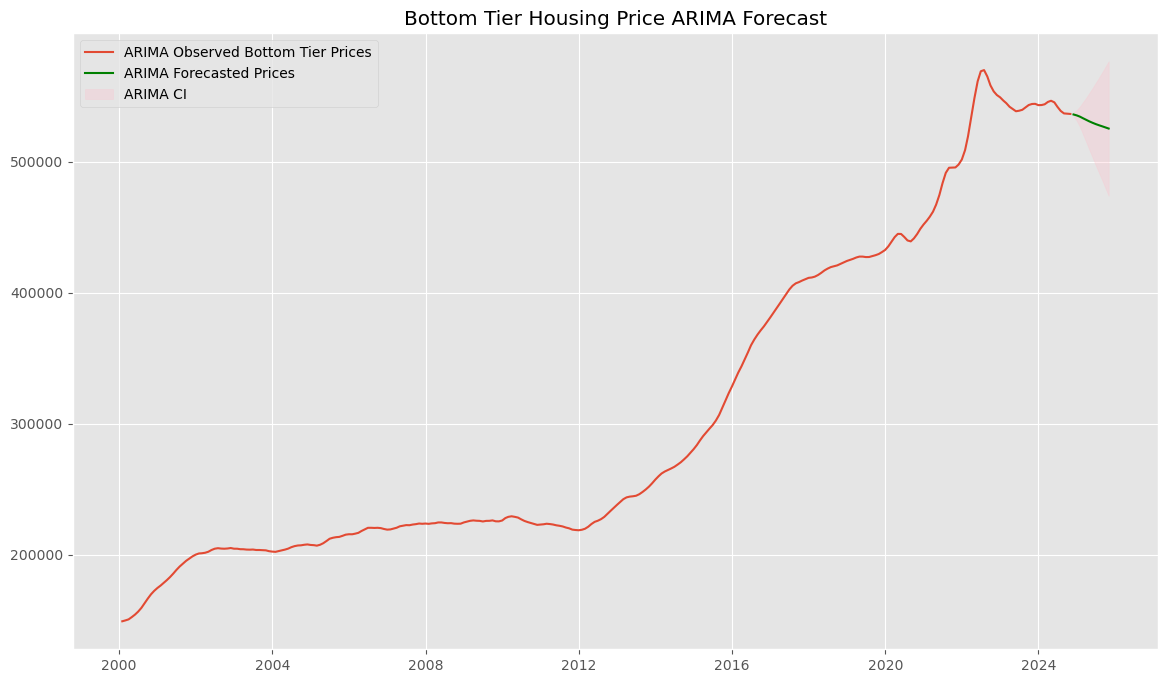

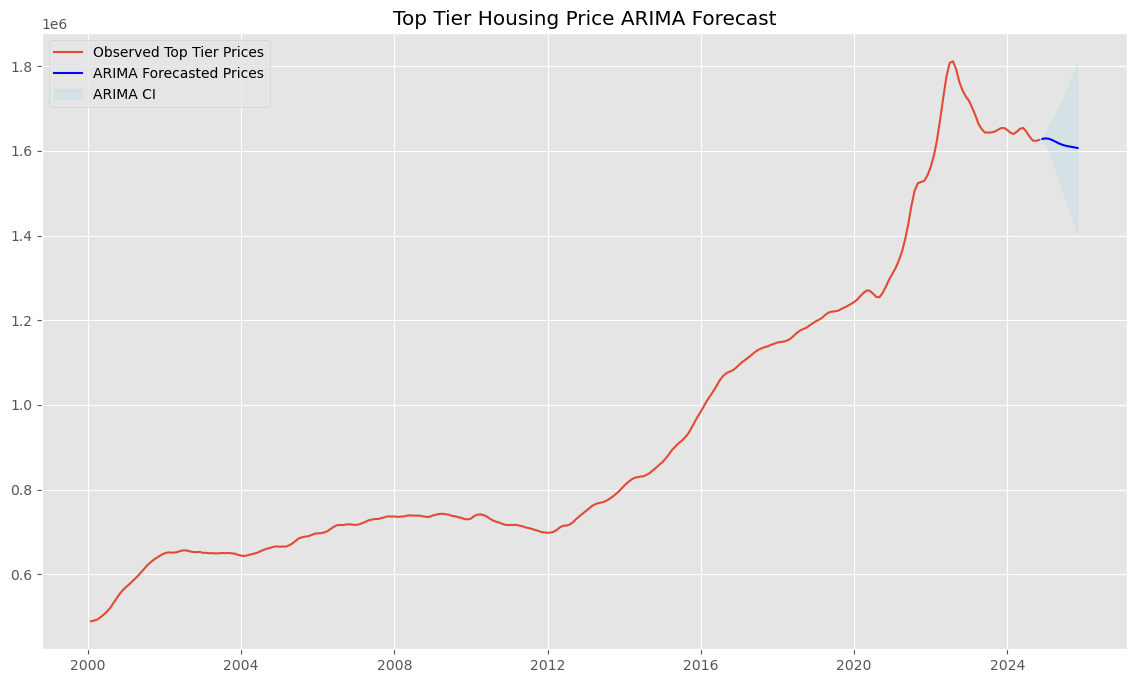

In [71]:
import numpy as np

# Reintegrate Bottom Tier Forecast
forecast_bottom = bottom_tier_model.get_forecast(steps=12)
forecast_bottom_diff = forecast_bottom.predicted_mean
forecast_bottom_index = pd.date_range(start=bottom_tier.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="ME")

# Convert differenced forecast to original scale
forecast_bottom_reintegrated = forecast_bottom_diff.cumsum() + bottom_tier.iloc[-1]

# Reintegrate confidence intervals
forecast_bottom_ci = forecast_bottom.conf_int()
forecast_bottom_ci_reintegrated = forecast_bottom_ci.cumsum() + bottom_tier.iloc[-1]

# Enforce non-negativity
forecast_bottom_reintegrated = np.maximum(forecast_bottom_reintegrated, 0)
forecast_bottom_ci_reintegrated.iloc[:, 0] = np.maximum(forecast_bottom_ci_reintegrated.iloc[:, 0], 0)
forecast_bottom_ci_reintegrated.iloc[:, 1] = np.maximum(forecast_bottom_ci_reintegrated.iloc[:, 1], 0)

# Reintegrate Top Tier Forecast
forecast_top = top_tier_model.get_forecast(steps=12)
forecast_top_diff = forecast_top.predicted_mean
forecast_top_index = pd.date_range(start=top_tier.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="ME")

# Convert differenced forecast to original scale
forecast_top_reintegrated = forecast_top_diff.cumsum() + top_tier.iloc[-1]

# Reintegrate confidence intervals
forecast_top_ci = forecast_top.conf_int()
forecast_top_ci_reintegrated = forecast_top_ci.cumsum() + top_tier.iloc[-1]

# Enforce non-negativity
forecast_top_reintegrated = np.maximum(forecast_top_reintegrated, 0)
forecast_top_ci_reintegrated.iloc[:, 0] = np.maximum(forecast_top_ci_reintegrated.iloc[:, 0], 0)
forecast_top_ci_reintegrated.iloc[:, 1] = np.maximum(forecast_top_ci_reintegrated.iloc[:, 1], 0)

# Plot Forecasts for Bottom Tier
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="ARIMA Observed Bottom Tier Prices")
plt.plot(forecast_bottom_index, forecast_bottom_reintegrated, label="ARIMA Forecasted Prices", color="green")
plt.fill_between(forecast_bottom_index,
                 forecast_bottom_ci_reintegrated.iloc[:, 0],
                 forecast_bottom_ci_reintegrated.iloc[:, 1],
                 color="pink", alpha=0.3, label="ARIMA CI")
plt.title("Bottom Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()

# Plot Forecasts for Top Tier
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices")
plt.plot(forecast_top_index, forecast_top_reintegrated, label="ARIMA Forecasted Prices", color="blue")
plt.fill_between(forecast_top_index,
                 forecast_top_ci_reintegrated.iloc[:, 0],
                 forecast_top_ci_reintegrated.iloc[:, 1],
                 color="lightblue", alpha=0.3, label="ARIMA CI")
plt.title("Top Tier Housing Price ARIMA Forecast")
plt.legend()
plt.show()


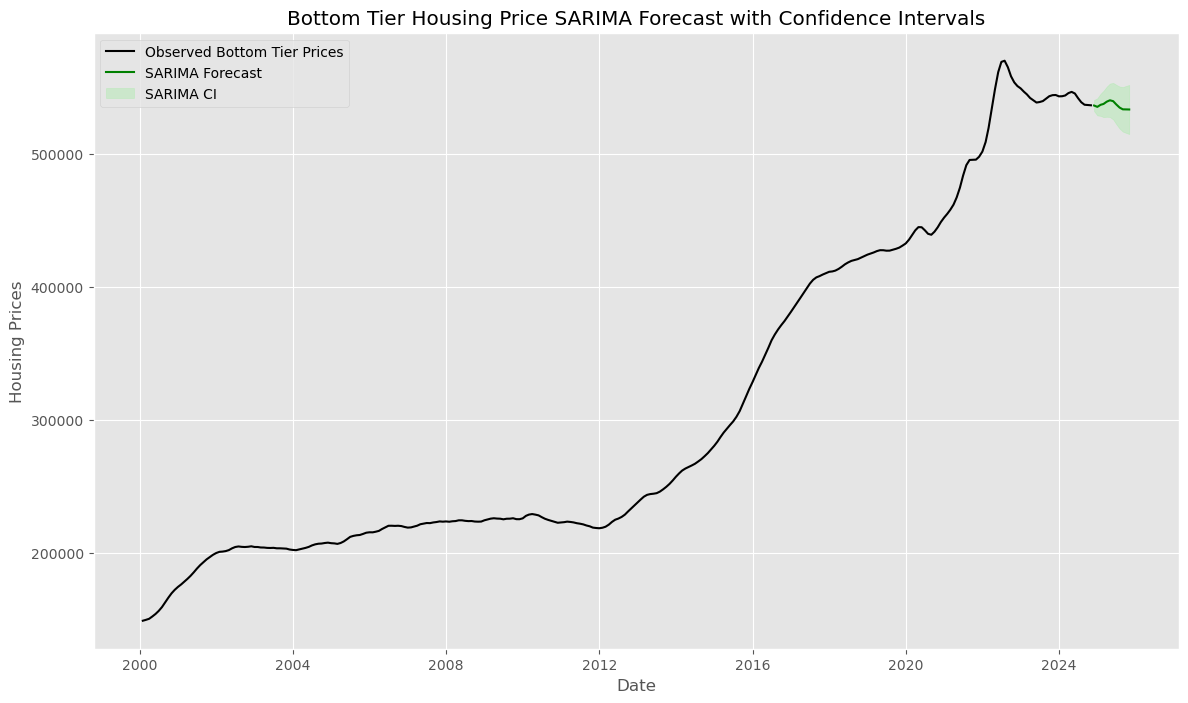

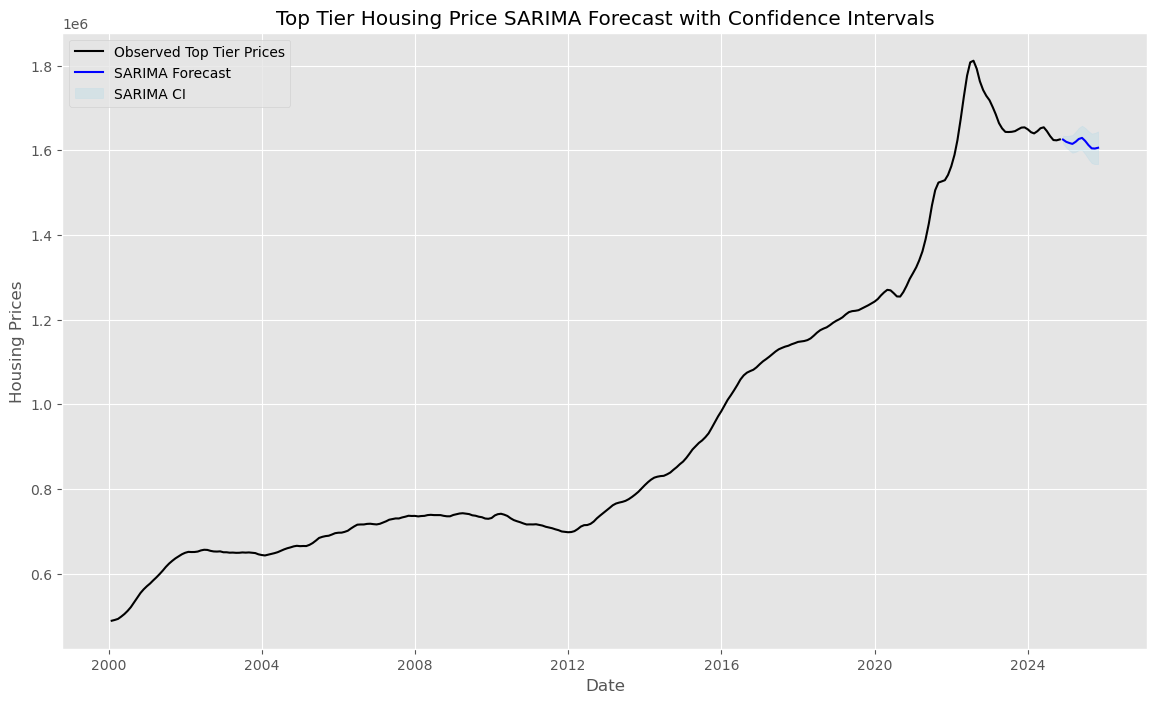

In [73]:

# Plot SARIMA Forecast with Confidence Intervals for Bottom Tier
plt.figure(figsize=(14, 8))
plt.plot(bottom_tier, label="Observed Bottom Tier Prices", color="black")
plt.plot(forecast_sarima_bottom_mean.index, forecast_sarima_bottom_mean, label="SARIMA Forecast", color="green")
plt.fill_between(forecast_sarima_bottom_mean.index,
                 forecast_sarima_bottom_ci.iloc[:, 0],
                 forecast_sarima_bottom_ci.iloc[:, 1],
                 color="lightgreen", alpha=0.3, label="SARIMA CI")
plt.title("Bottom Tier Housing Price SARIMA Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Housing Prices")
plt.legend()
plt.show()

# Plot SARIMA Forecast with Confidence Intervals for Top Tier
plt.figure(figsize=(14, 8))
plt.plot(top_tier, label="Observed Top Tier Prices", color="black")
plt.plot(forecast_sarima_top_mean.index, forecast_sarima_top_mean, label="SARIMA Forecast", color="blue")
plt.fill_between(forecast_sarima_top_mean.index,
                 forecast_sarima_top_ci.iloc[:, 0],
                 forecast_sarima_top_ci.iloc[:, 1],
                 color="lightblue", alpha=0.3, label="SARIMA CI")
plt.title("Top Tier Housing Price SARIMA Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Housing Prices")
plt.legend()
plt.show()